[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/danielmlow/construct-tracker/blob/main/tutorials/lexicon_network.ipynb)

# Create a circular network from your lexicon and compute similarity between its averaged tokens

In [3]:

'''
Authors: Daniel M. Low
License: See license in github repository
'''

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

ts = datetime.datetime.utcnow().strftime('%y-%m-%dT%H-%M-%S')

pd.set_option("display.max_columns", None)
# pd.options.display.width = 0

on_colab = False

if on_colab:
  from google.colab import drive
  project_name = 'project_name'
  drive.mount('/content/drive')
  input_dir = f'/content/drive/MyDrive/datum/{project_name}/data/input/'
  output_dir = f'/content/drive/MyDrive/datum/{project_name}/data/output/'
else:
  input_dir = './data/input/'
  output_dir = './data/output/'

os.makedirs(output_dir, exist_ok=True)

In [62]:
from construct_tracker import lexicon
# lexicon_obj = lexicon.load_lexicon(name = 'srl_prototypes_v1-0')
lexicon_obj = lexicon.load_lexicon(name = 'srl_v1-0')


You can also load from json
```python
import json

path_to_lexicon_json = f'./data/input/lexicons/suicide_risk_lexicon_preprocessing/lexicon_name.json'

with open(path_to_lexicon_json, 'r') as json_file:
  lexicon = json.load(json_file)
```

# Encode


In [63]:
embeddings_name = 'all-MiniLM-L6-v2'

In [65]:
from sentence_transformers import SentenceTransformer 
import torch

sentence_embedding_model = SentenceTransformer(embeddings_name)       # load embedding

embeddings_d_avg = {}

for construct in lexicon_obj.construct_names:
    print(construct)
    # embeddings_d_construct_i= {}
    tokens = lexicon_obj.constructs[construct]['tokens']
    embeddings = sentence_embedding_model.encode(tokens, convert_to_tensor=True,show_progress_bar=False)
    embeddings_avg = np.array(torch.mean(embeddings.cpu(), axis=0))  # Move to CPU before converting to NumPy
    # embeddings_d_construct_i.update(dict(zip(tokens, embeddings)))
    embeddings_d_avg[construct] = embeddings_avg

/Users/danielmlow/miniconda3/envs/ct/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Existential meaninglessness & purposelessness
Depressed mood
Shame, self-disgust, & worthlessness
Emptiness
Other suicidal language
Sleep issues
Fatigue & tired
Panic
Direct self-injury
Physical abuse & violence
Barriers to treatment
Social withdrawal
Active suicidal ideation & suicidal planning
Incarceration
Defeat & feeling like a failure
Anxiety
Alcohol use
Grief & bereavement
Eating disorders
Burdensomeness
Impulsivity
Borderline Personality Disorder
Rumination
Poverty & homelessness
Hopelessness
Physical health issues & disability
Finances & work stress
Mental health treatment
Perfectionism
Other substance use
Lethal means for suicide
Sexual abuse & harassment
Emotional pain & psychache
Passive suicidal ideation
Bullying
Loneliness & isolation
Hospitalization
Relationships & kinship
Entrapment & desire to escape
Trauma & PTSD
Aggression & irritability
Agitation
Discrimination
Bipolar Disorder
Suicide exposure
Anhedonia & uninterested
Relationship issues
Psychosis & schizophrenia
G

In [66]:

# x = []
# for construct in lexicon_obj.construct_names:
#     x.append(embeddings_d_avg[construct])
    

x = pd.DataFrame(embeddings_d_avg.values(), index = embeddings_d_avg.keys())

# Network

Some references and inspirations:
- https://r-graph-gallery.com/309-intro-to-hierarchical-edge-bundling.html
- https://kateto.net/netscix2016.html
- https://ladal.edu.au/coll.html
- https://yunranchen.github.io/intro-net-r/advanced-network-visualization.html 
- https://bookdown.org/content/b298e479-b1ab-49fa-b83d-a57c2b034d49/flow.html
- https://ladal.edu.au/net.html

In [67]:
categories = {
    'Suicidal constructs':[
        'Passive suicidal ideation',
        'Active suicidal ideation & suicidal planning',        
        'Lethal means for suicide',
        'Direct self-injury',
        'Suicide exposure',
        'Other suicidal language',
		'Hospitalization',
    ],
    'Negative perception of self':[
        'Burdensomeness',
        'Defeat & feeling like a failure',
        'Existential meaninglessness & purposelessness',
        'Shame, self-disgust, & worthlessness',
        'Guilt',
    ],
    'Depressive symptoms':[
        'Depressed mood',
        'Anhedonia & uninterested',
        'Emotional pain & psychache',
        'Grief & bereavement',
        'Emptiness',
        'Hopelessness',
        'Fatigue & tired',
        ],
    
    'Anxious symptoms':[
        
        'Anxiety',
        'Panic',
        'Trauma & PTSD',
        'Agitation',
        'Rumination',
        'Perfectionism',
        'Entrapment & desire to escape',
    ],
    "Interpersonal":[
        'Loneliness & isolation',
        'Social withdrawal',
        'Relationship issues',
        'Relationships & kinship',
        'Bullying',
        'Sexual abuse & harassment',
        'Physical abuse & violence',
    ],
    "Externalizing":[
        'Aggression & irritability',
        'Impulsivity',
        'Alcohol use',
        'Other substance use',
    ],
    "Other disorders": [
        'Psychosis & schizophrenia',
        'Bipolar Disorder',
        'Borderline Personality Disorder',
        'Eating disorders',
        'Sleep issues',
],
    "Social and other determinants":[
        'Physical health issues & disability',
        'Incarceration',
        'Poverty & homelessness',
        'Gender & sexual identity',
        'Discrimination',
        'Finances & work stress',
        'Barriers to treatment',
        'Mental health treatment'
]    
}



In [68]:
# https://davidmathlogic.com/colorblind/#%23AB98FF-%23E69F00-%2377CEFF-%23009E73-%23F0E442-%230072B2-%23D55E00-%23CC79A7
wong =  ['#AB98FF', #changed to lilac
 '#0072B2', # lightorange
 '#77CEFF', #changed to light blue
 '#BCFFCF', # changed turqoise
 '#F0E442', # mustard
 '#E69F00', # darkblue
 '#D55E00', # darkorange
 '#CC79A7'] # pink

colors = dict(zip(categories.keys(), wong))

colors_list = []
constructs = []
for category in categories.keys():
    category_constructs = categories.get(category)
    constructs.extend(category_constructs)

for construct in constructs:
    for category in categories.keys():
        category_constructs = categories.get(category)
        if construct in category_constructs:
            colors_list.append(category)

colors_list = [colors.get(n) for n in colors_list]

In [69]:
from sklearn.metrics.pairwise import cosine_similarity

x = x.T[constructs] # re-order
x = x.T

x_cos = cosine_similarity(x)
x_cos

array([[1.        , 0.7491964 , 0.6255421 , ..., 0.49322525, 0.5544845 ,
        0.5294551 ],
       [0.7491964 , 0.99999964, 0.861311  , ..., 0.5995405 , 0.6109108 ,
        0.63098204],
       [0.6255421 , 0.861311  , 1.0000001 , ..., 0.6697694 , 0.5705496 ,
        0.7470046 ],
       ...,
       [0.49322525, 0.5995405 , 0.6697694 , ..., 1.0000002 , 0.4759056 ,
        0.5860061 ],
       [0.5544845 , 0.6109108 , 0.5705496 , ..., 0.4759056 , 0.99999976,
        0.7527637 ],
       [0.5294551 , 0.63098204, 0.7470046 , ..., 0.5860061 , 0.7527637 ,
        1.0000005 ]], dtype=float32)

(2500, 4)
(1275, 4)


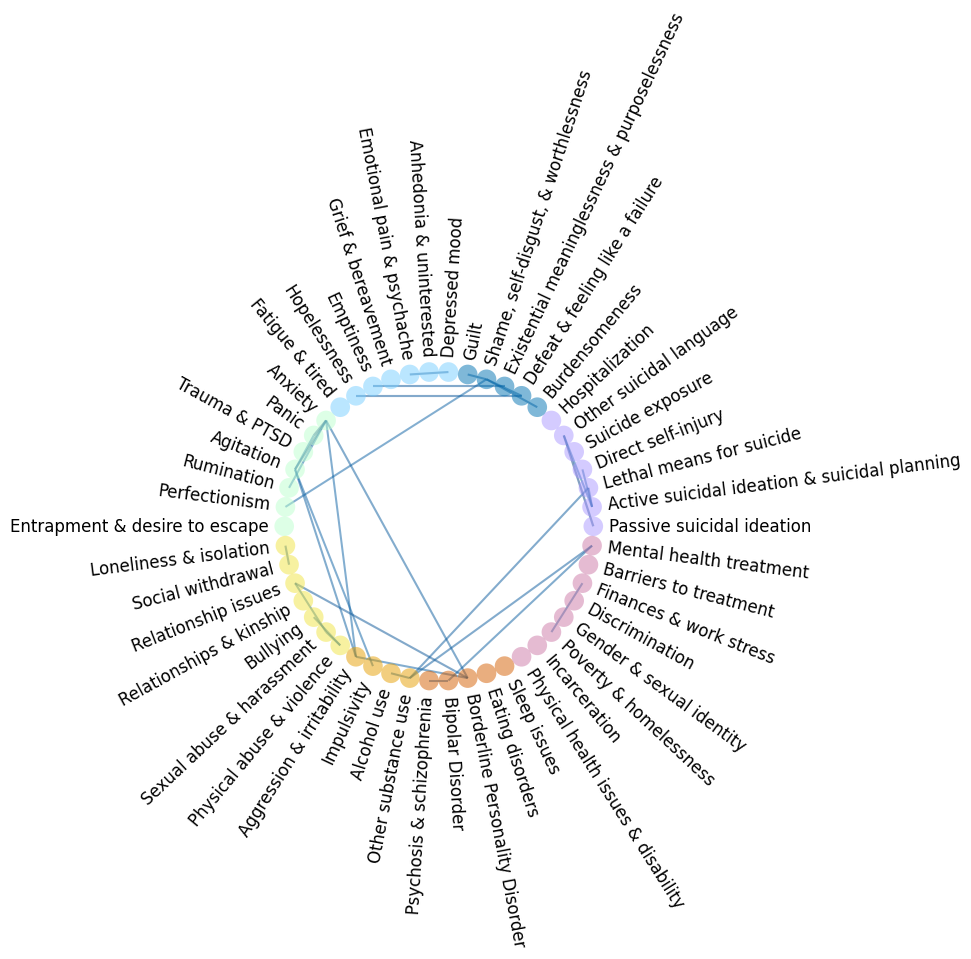

In [127]:
# Transform it in a links data frame (3 columns only):
# from matplotlib.patches import FancyArrowPatch
import networkx as nx

threshold = 0.84 # cosine similarity above which to show, to avoid cluttered figure. originally 0.59. depends on specific embeddings used.

links = pd.DataFrame(x_cos).stack().reset_index()
links.columns = ['var1', 'var2', 'value']

value_pairs = []
for v1,v2,v in links.values:
    value_pair_i = [v1,v2]
    value_pair_i.sort()
    value_pairs.append(value_pair_i)
    
links['var_pairs'] = value_pairs
print(links.shape)
links = links.drop_duplicates('var_pairs')
print(links.shape)


# Set values below threshold to 0
v_new = []
for v in links['value'].values:
    v = np.round(float(v),3)
    if v == 1 or v<threshold:
        v = 0
    v_new.append(v)

links['value'] = v_new

G = nx.Graph()

for _, row in links.iterrows():
    G.add_edge(row['var1'], row['var2'], weight=row['value'])

n = len(constructs)
node_list = sorted(G.nodes())
angle = []
angle_dict = {}
for i, node in zip(range(n),node_list):
    theta = 2.0*np.pi*i/n
    angle.append((np.cos(theta),np.sin(theta)))
    angle_dict[node] = theta

pos = {}
for node_i, node in enumerate(node_list):
    pos[node] = angle[node_i]

labels = dict(zip(range(n), constructs))

# figsize is intentionally set small to condense the graph
fig, ax = plt.subplots(figsize=(11,11))
margin=0.33
fig.subplots_adjust(margin, margin, 1.-margin, 1.-margin)
ax.axis('equal')

edges = G.edges()
edge_pos = np.array([(pos[u], pos[v]) for u, v in edges])
edge_weights = [(d['weight']) for u, v, d in G.edges(data=True)]

min_weight = np.min(edge_weights)
max_weight = np.max(edge_weights)
scaled_weights = (edge_weights - min_weight) / (max_weight - min_weight) 


options = {
    "node_size": 200,
    "font_color": colors_list ,
    "node_color": colors_list ,
    "edge_color" : scaled_weights,
    "alpha" : 0.5,
    "edge_cmap": plt.cm.GnBu,
    "linewidths": 0,
    "width": np.array(edge_weights)*1.75,
}

nx.draw(G,pos=pos, ax=ax, **options)


# Draw labels with custom rotation
description = nx.draw_networkx_labels(G,pos,labels=labels)
r = fig.canvas.get_renderer()
trans = plt.gca().transData.inverted()
for node, t in description.items():
    bb = t.get_window_extent(renderer=r)
    construct_i= t.get_text()    
    bbdata = bb.transformed(trans)
    radius = 1.1+bbdata.width/2.
    position = (radius*np.cos(angle_dict[node]),radius* np.sin(angle_dict[node]))
    t.set_position(position)
    

    # Calculate rotation angle, adding 180 degrees if on the left side of the circle
    if np.cos(angle_dict[node]) < 0:  # Node is on the left
        rotation_angle = (angle_dict[node] * 360.0 / (2.0 * np.pi)) + 180
    else:
        rotation_angle = angle_dict[node] * 360.0 / (2.0 * np.pi)
    
    t.set_rotation(rotation_angle)
    t.set_clip_on(False)

plt.axis("off")

plt.savefig(output_dir+'suicide_risk_lexicon_circular_network.png', dpi=300)

plt.show()

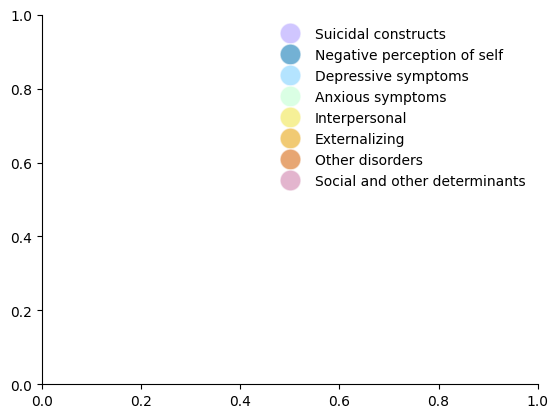

In [128]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create figure and axes
fig, ax = plt.subplots()
from matplotlib.lines import Line2D

# Define custom legend entries
legend_entries = list(colors.items())

# Create a list of patches for the legend
# patches = [mpatches.Patch(color=color, label=label) for label, color in legend_entries]

# Add the custom legend to the plot
circles = [Line2D([0], [0], marker='o', color='w', label=label,alpha=0.55,
                  markerfacecolor=color, markersize=15) for label, color in legend_entries]

# Add the custom legend to the plot
legend = ax.legend(handles=circles, frameon=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# legend = ax.legend(handles=patches)  # Adjust alpha value here
# (0.5)  # Adjust alpha value here

# Optional: Add other plot elements or annotations
# ax.set_xlim(0, 5)
# ax.set_ylim(0, 5)
plt.savefig(output_dir+'suicide_risk_lexicon_circular_network_legend.png', dpi=300)
plt.show()


In [129]:
# !pip install pillow

In [130]:
from PIL import Image

# Open the larger image
larger_image_path = output_dir+'suicide_risk_lexicon_circular_network.png'  # Update this path
larger_image = Image.open(larger_image_path)

# Open the smaller image
smaller_image_path = output_dir+'suicide_risk_lexicon_circular_network_legend.png'  # Update this path
smaller_image = Image.open(smaller_image_path)

# Open the image file
img = smaller_image

width, height = img.size

left = 930
upper = 190
right = 1710
lower = 710

# Define the crop box
crop_box = (left, upper, right, lower)

# Define the crop box (left, upper, right, lower)
# crop_box = (100, 100, 400, 400)  # Adjust these values to your desired cropping area

# Crop the image
cropped_image = img.crop(crop_box)

cropped_image.save(smaller_image_path, dpi = (400,400))

# Show the cropped image
cropped_image.show()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [131]:


# Open the image file
img = larger_image

width, height = img.size

left = 260
upper = 50
right = width - 50
lower = height - 310

# Define the crop box
crop_box = (left, upper, right, lower)

# Define the crop box (left, upper, right, lower)
# crop_box = (100, 100, 400, 400)  # Adjust these values to your desired cropping area

# Crop the image
cropped_image = img.crop(crop_box)

cropped_image.save(larger_image_path)

# Show the cropped image
# cropped_image.show()

In [132]:
(left, upper, right, lower)

(260, 50, 3250, 2990)

In [134]:
from PIL import Image

# Open the larger image
larger_image_path = output_dir+'suicide_risk_lexicon_circular_network.png'  # Update this path
larger_image = Image.open(larger_image_path)

# Open the smaller image
smaller_image_path = output_dir+'suicide_risk_lexicon_circular_network_legend.png'  # Update this path
smaller_image = Image.open(smaller_image_path)

new_width = int(smaller_image.width * 1.5)
new_height = int(smaller_image.height * 1.5)

# Resize the smaller image
smaller_image = smaller_image.resize((new_width, new_height))


# Optionally, if the smaller image needs resizing to fit a specific part of the larger image, you can resize it
# smaller_image = smaller_image.resize((new_width, new_height))

# Paste the smaller image onto the larger image at the upper left corner (0, 0)
new_width = int(larger_image.width * 1.2)
new_height = int(larger_image.height * 1.2)
larger_image = larger_image.resize((new_width, new_height))
larger_image.paste(smaller_image, (0, 0))

# Save or display the combined image
combined_image_path = output_dir+'suicide_risk_lexicon_circular_network_combined.png'  # Update this path
larger_image.save(combined_image_path)

# Or display the combined image directly
larger_image.show()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


# Dendrogram

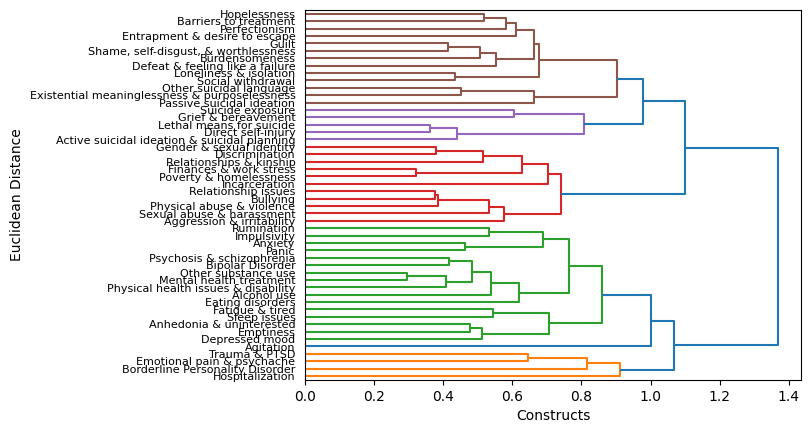

In [60]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, 
                                        method = 'ward', 
                                        metric = 'euclidean'),
                            orientation = 'right',
                            # color_threshold = 0.3
                           )
# plt.title('Dendrogram')
plt.xlabel('Constructs')
plt.ylabel('Euclidean Distance')
ticklabels = plt.gca().get_yticklabels()
ticklabels_pos = [int(n.get_position()[1]) for n in ticklabels]
ticklabels_text = [int(n.get_text()) for n in ticklabels]
ticklabels_text = [list(x.index)[n] for n in ticklabels_text]
plt.yticks(ticks = ticklabels_pos, labels = ticklabels_text)
plt.show()